In [1]:
# Import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Sort by Month (ISPA)

In [2]:
# Add csv file
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/skripsi fix/allvar_ispa.csv')
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   KABKOT      300 non-null    object 
 2   month       300 non-null    int64  
 3   year        300 non-null    int64  
 4   longitude   300 non-null    float64
 5   latitude    300 non-null    float64
 6   pm2p5       300 non-null    float64
 7   time        300 non-null    object 
 8   RH          300 non-null    float64
 9   t2m         300 non-null    float64
 10  tp          300 non-null    float64
 11  ispa        300 non-null    int64  
 12  pm10        300 non-null    float64
 13  so2         300 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 32.9+ KB


In [3]:
# Drop the columns
df_ispa = df_ispa.drop(['Unnamed: 0', 'RH', 'so2', 'pm10', 'pm2p5', 'tp', 't2m'], axis=1)

In [4]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KABKOT     300 non-null    object 
 1   month      300 non-null    int64  
 2   year       300 non-null    int64  
 3   longitude  300 non-null    float64
 4   latitude   300 non-null    float64
 5   time       300 non-null    object 
 6   ispa       300 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 16.5+ KB


In [7]:
# Filter for years 2018-2022
data_ispa = df_ispa[(df_ispa['year'] >= 2018) & (df_ispa['year'] <= 2022)]

# Group sum_ispa by KABKOT, month, and time
ispa_sort = data_ispa.groupby(['KABKOT', 'month', 'time'])['ispa'].sum()
ispa_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    35036
                      2019-01-01     1688
                      2020-01-01    30245
                      2021-01-01     8616
                      2022-01-01    19330
                                    ...  
JAKARTA UTARA  12     2018-12-01     9376
                      2019-12-01    31251
                      2020-12-01     6555
                      2021-12-01    11270
                      2022-12-01    25644
Name: ispa, Length: 300, dtype: int64

Sort by Month (PM10)

In [8]:
# Add csv file
df_pm10 = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/skripsi fix/allvar_ispa.csv')
df_pm10 = df_pm10.drop(['Unnamed: 0', 'ispa', 't2m', 'RH', 'so2', 'pm2p5', 'tp'], axis=1)
df_pm10

,KABKOT,month,year,longitude,latitude,time,pm10
0,JAKARTA BARAT,1,2018,106.750000,-6.158333,2018-01-01,47.294950
1,JAKARTA BARAT,2,2018,106.750000,-6.158333,2018-02-01,55.981318
2,JAKARTA BARAT,3,2018,106.750000,-6.158333,2018-03-01,63.225958
3,JAKARTA BARAT,4,2018,106.750000,-6.158333,2018-04-01,86.887396
4,JAKARTA BARAT,5,2018,106.750000,-6.158333,2018-05-01,96.986573
...,...,...,...,...,...,...,...
295,JAKARTA UTARA,8,2022,106.891667,-6.125000,2022-08-01,85.524501
296,JAKARTA UTARA,9,2022,106.891667,-6.125000,2022-09-01,87.035939
297,JAKARTA UTARA,10,2022,106.891667,-6.125000,2022-10-01,70.626910
298,JAKARTA UTARA,11,2022,106.891667,-6.125000,2022-11-01,66.740500


In [9]:
# Filter for years 2018-2022
data_pm10 = df_pm10[(df_pm10['year'] >= 2018) & (df_pm10['year'] <= 2022)]

# Group mean_RH by KABKOT, month, and time
pm10_sort = data_pm10.groupby(['KABKOT', 'month', 'time'])['pm10'].mean()
pm10_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    47.294950
                      2019-01-01    56.890549
                      2020-01-01    56.164344
                      2021-01-01    55.754458
                      2022-01-01    57.999436
                                      ...    
JAKARTA UTARA  12     2018-12-01    59.224384
                      2019-12-01    68.288062
                      2020-12-01    44.226031
                      2021-12-01    60.627811
                      2022-12-01    56.155258
Name: pm10, Length: 300, dtype: float64

Merge ISPA and pm2p5 (sorted)

In [10]:
merge_ispa_pm10 = pd.merge(ispa_sort, pm10_sort, on=['KABKOT','month','time'])
merge_ispa_pm10

ispa       pm10
KABKOT        month time                        
JAKARTA BARAT 1     2018-01-01  35036  47.294950
                    2019-01-01   1688  56.890549
                    2020-01-01  30245  56.164344
                    2021-01-01   8616  55.754458
                    2022-01-01  19330  57.999436
...                               ...        ...
JAKARTA UTARA 12    2018-12-01   9376  59.224384
                    2019-12-01  31251  68.288062
                    2020-12-01   6555  44.226031
                    2021-12-01  11270  60.627811
                    2022-12-01  25644  56.155258

[300 rows x 2 columns]

In [11]:
overlay = merge_ispa_pm10.groupby(['KABKOT', 'month']).agg({'ispa':'sum', 'pm10':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

# rename columns
overlay = overlay.rename(columns={'ispa': 'sum_ispa', 'pm10':'mean_pm10'})

In [12]:
overlay

,KABKOT,month,sum_ispa,mean_pm10
0,JAKARTA BARAT,1,94915,54.820748
1,JAKARTA BARAT,2,61569,58.284398
2,JAKARTA BARAT,3,56608,65.689203
3,JAKARTA BARAT,4,39893,79.537229
4,JAKARTA BARAT,5,31488,87.775776
5,JAKARTA BARAT,6,41114,90.324803
6,JAKARTA BARAT,7,36988,89.094666
7,JAKARTA BARAT,8,39798,85.099615
8,JAKARTA BARAT,9,48285,82.619808
9,JAKARTA BARAT,10,57399,81.994651


Rename month for month_name

In [13]:
import calendar

# Format for monthly graph
overlay['month'] = pd.to_datetime(overlay['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
overlay= overlay.set_index('month').reset_index()

Plot ISPA x t2m

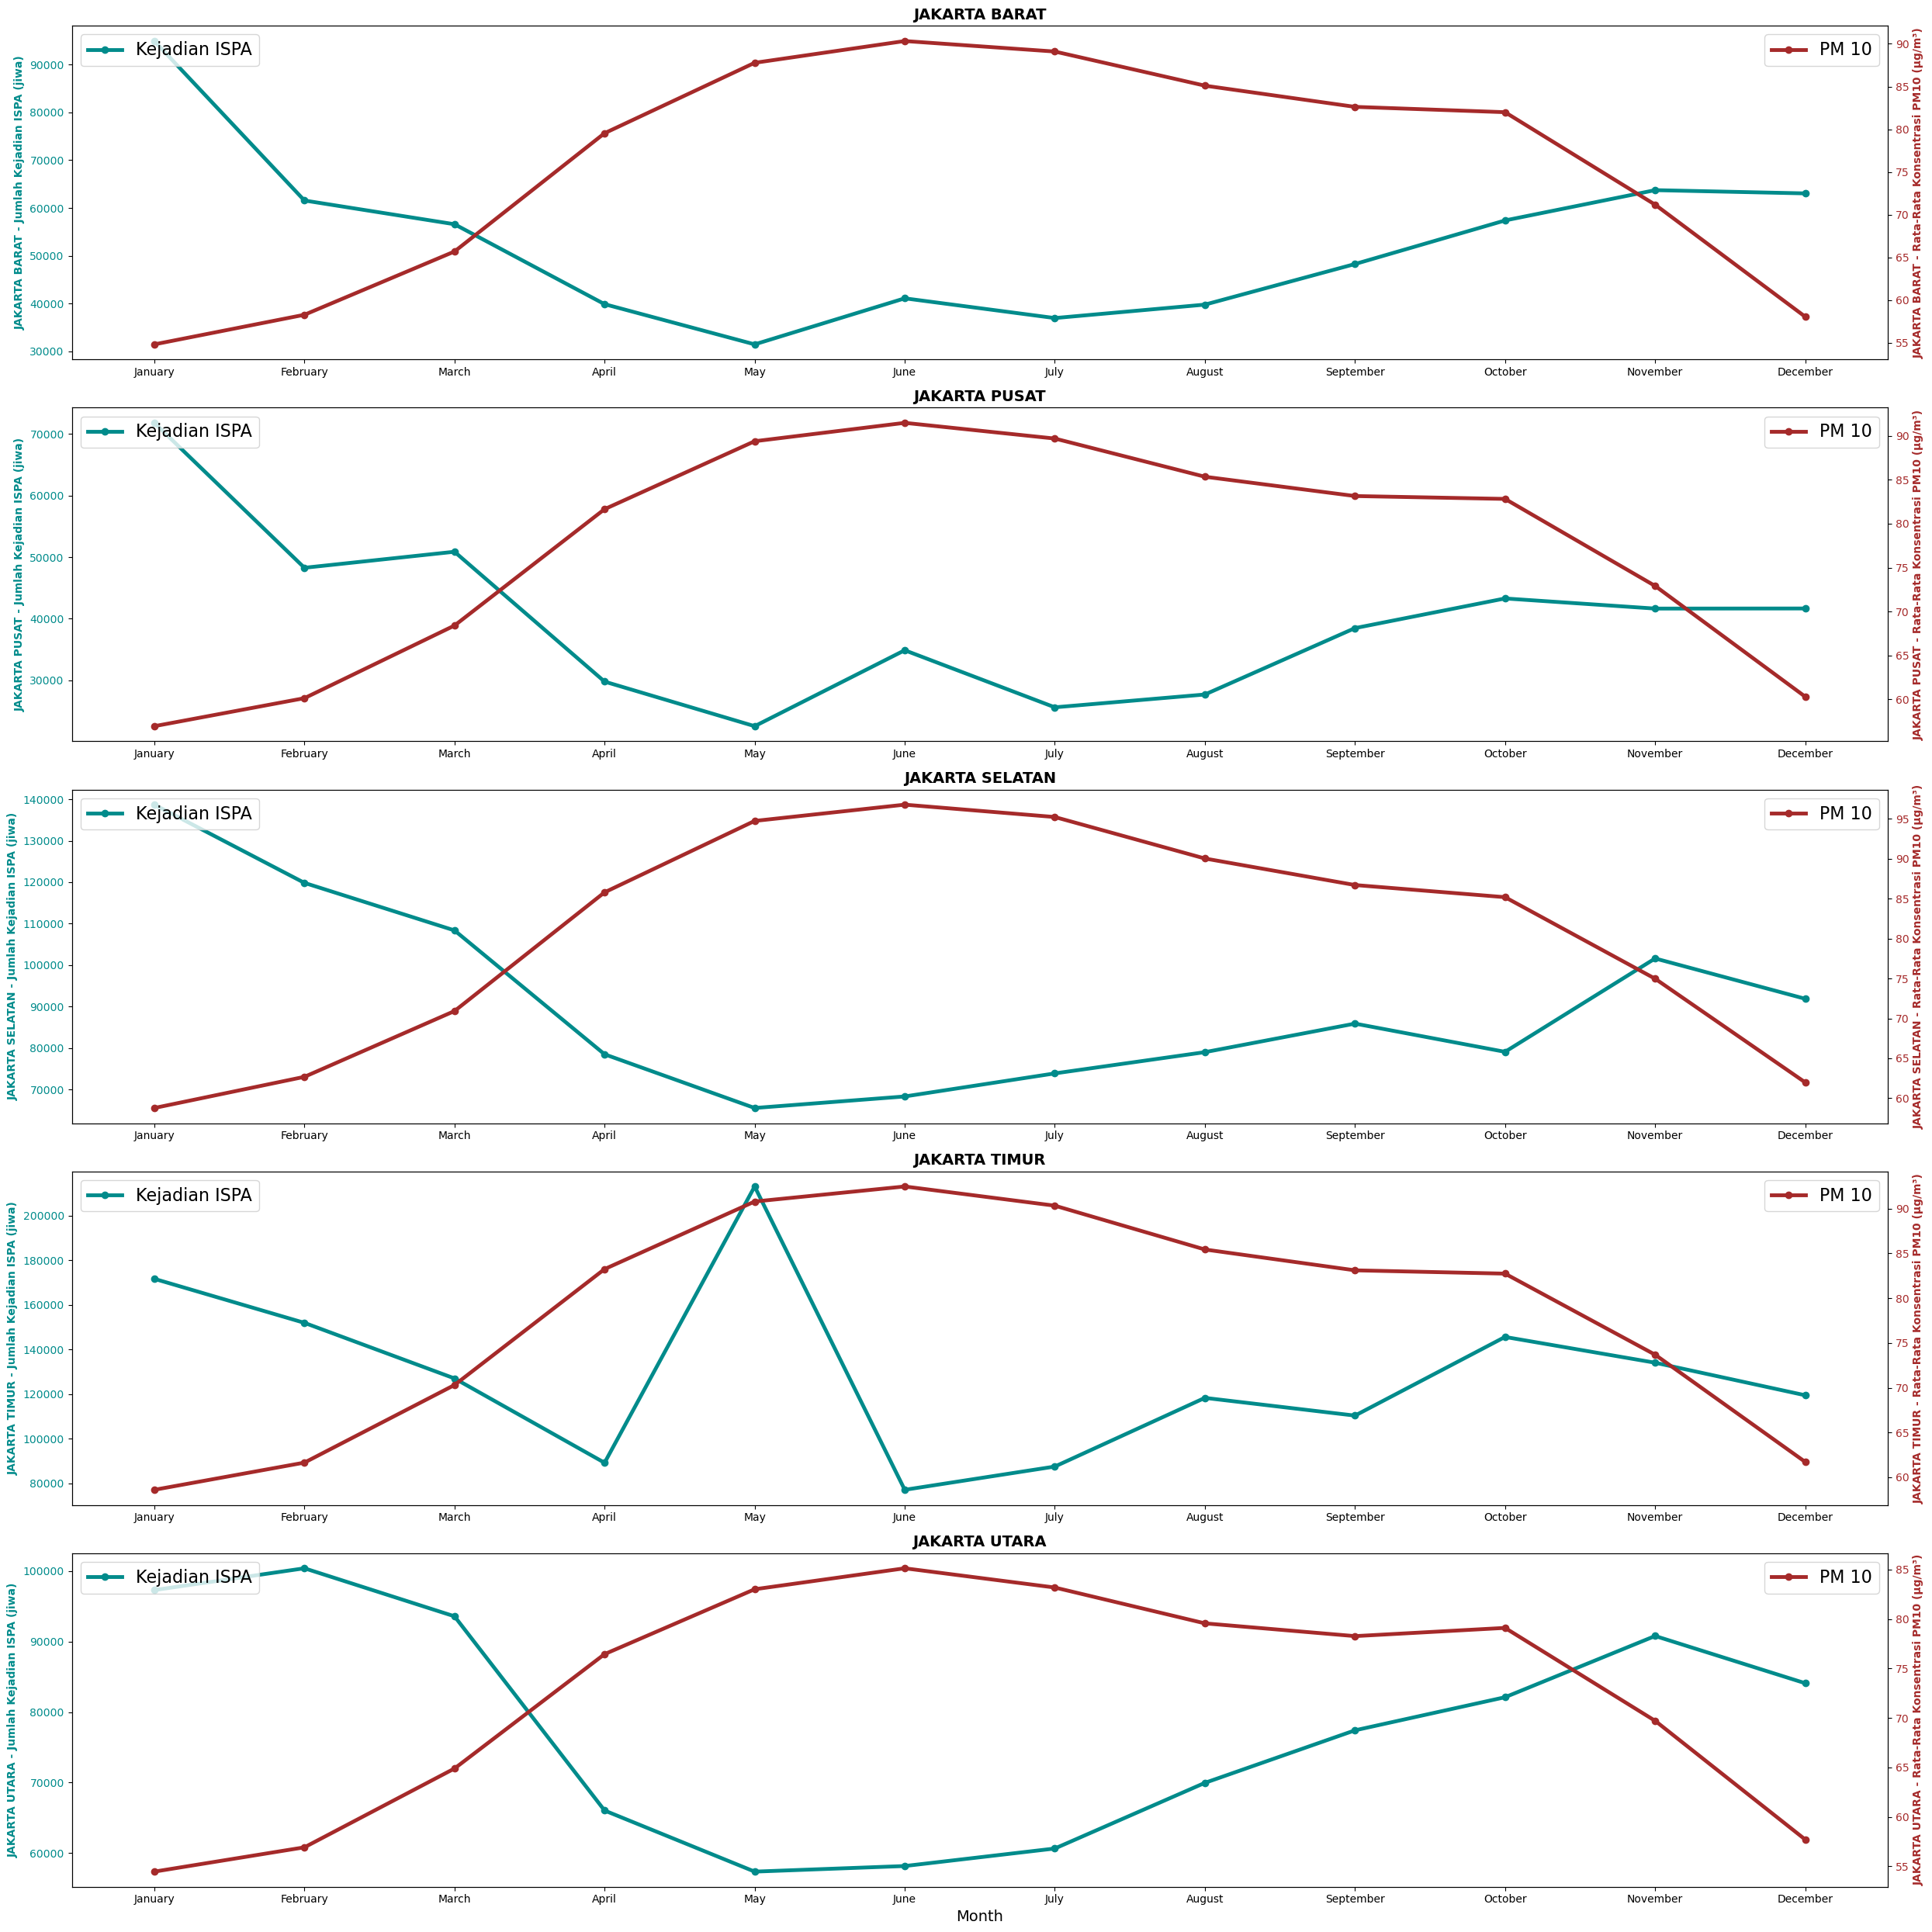

In [15]:
indicators = ['sum_ispa', 'mean_pm10']

# Group data by KABKOT
grouped_data = overlay.groupby('KABKOT')

# Plot time series for 'tb' and 'pm2p5' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(25, len(grouped_data)*5), sharex=False)


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['sum_ispa']
    y2 = group['mean_pm10']

    ax.plot(x, y1, label='Kejadian ISPA', marker='o', linewidth=3.5, color='darkcyan')
    ax.set_ylabel(f'{name} - Jumlah Kejadian ISPA (jiwa)', color='darkcyan', weight='bold')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='PM 10', marker='o',linewidth=3.5, color='brown')
    ax2.set_ylabel(f'{name} - Rata-Rata Konsentrasi PM10 (µg/m³)', color='brown', weight='bold')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)

# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', weight='bold', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR', weight='bold', fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', weight='bold', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', weight='bold', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', weight='bold', fontsize= 14)

plt.tight_layout()
plt.show()